<a href="https://colab.research.google.com/github/sivamsinghsh/The-Spark-Foundation-Internship/blob/main/Task_2_Prediction_Using_Unsupervised_ML_(SHIVAM_SINGH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Shivam Singh

## GRIPFEB22 - The Spark Foundation- Data Science & Business Analytics Internship

### Task 02 : Prediction using Unsupervised ML
 - From the given 'IRIS' dataset predict the optimal number of clusters and represents it visually

#### Libraries Used

 - PANDAS,NUMPY for data manuplation.
 - Matplotlib,seaborn module for Data Visualisation.
 - sklearn for modelling

## Step 1: Reading and Importing Data

In [ ]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [ ]:
# Read the csv file
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.shape

(150, 6)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### There are no null values in the dataset

In [ ]:
iris_df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

## Step 2: Data Preprocessing

In [ ]:
iris_df.drop('Id', axis = 1, inplace = True)
iris_df['ID'] = iris_df.index+100
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ID
0,5.1,3.5,1.4,0.2,Iris-setosa,100
1,4.9,3.0,1.4,0.2,Iris-setosa,101
2,4.7,3.2,1.3,0.2,Iris-setosa,102
3,4.6,3.1,1.5,0.2,Iris-setosa,103
4,5.0,3.6,1.4,0.2,Iris-setosa,104


## Step 3: Exploratory Data Analysis

#### Outliers

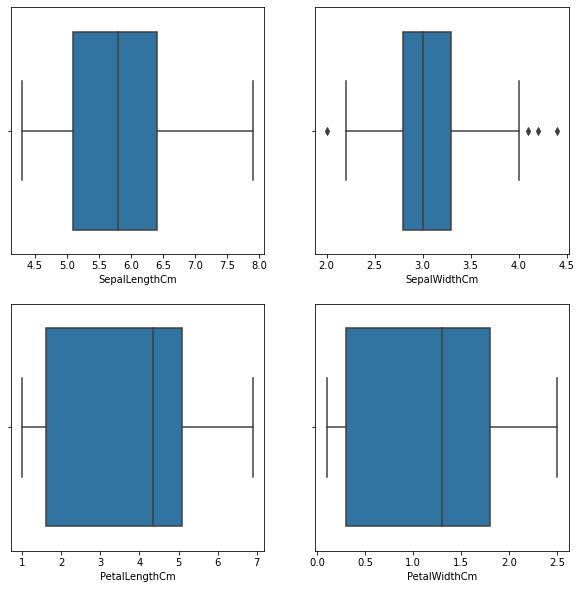

In [ ]:
plt.figure(figsize = (10,10))
f = iris_df.columns[:-2]
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = i[1], data =iris_df)

From the above plot, we can see that there are some outliers in SepalWidthCm, We will use capping with soft range to remove outliers

In [ ]:
# outliers treatment

q1 = iris_df['SepalWidthCm'].quantile(0.01)
q2 = iris_df['SepalWidthCm'].quantile(0.99)

iris_df['SepalWidthCm'][iris_df['SepalWidthCm']<=q1] = q1
iris_df['SepalWidthCm'][iris_df['SepalWidthCm']>=q2]= q2

In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(iris_df.drop(['ID','Species'], axis =1))

0.8163708511301014

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = ss.fit_transform(iris_df.drop(['ID','Species'], axis = 1))
df

array([[-9.00681170e-01,  1.05447769e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.25943021e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.46225265e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.10141122e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.29056183e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.99881426e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.18393550e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.18393550e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.62027163e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.10141122e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.52664598e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.18393550e-01, -1.22754100e+00,
      

In [ ]:
df = pd.DataFrame(df)
df.columns = iris_df.columns[:-2]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


## Step 4: KMeans Clustering

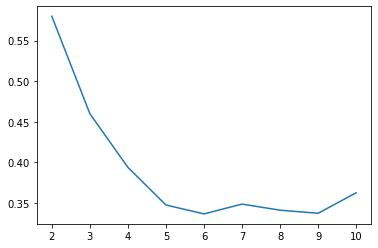

In [ ]:
# Silhouette Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df)
    ss.append([k, silhouette_score(df, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])
plt.show()

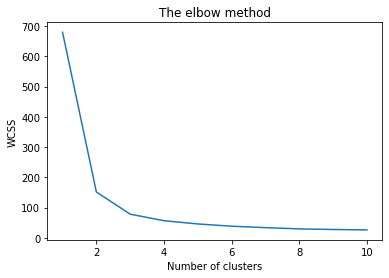

In [ ]:
## Elbow Cuve
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the above curve we can see that the optimum clusters is where the elbow occurs so it is called as Elbow Method.It occurs when WCSS doesn't decrease significantly with every iteration. Here, we choose the number of clusters as "3".

### KMean with K=3

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

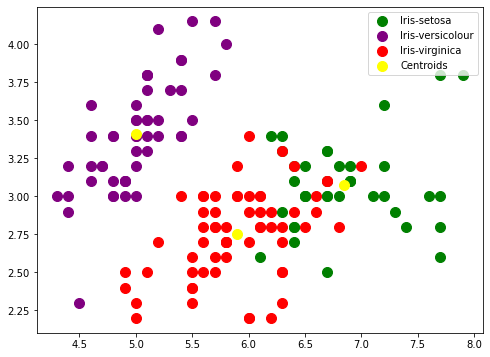

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()


----------------`**End Of NoteBook**`--------------------------------------------